# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the most promising treatment regimens among four(Capomulin, Ramicane, Infubinol, and Ceftamin) regimens as they resulted in the smallest tumor volume on average.
- The 'r' value is 0.84 which is greater than 0.7 and that idicates strong correlation between data.
- That means the final tumor volume was strongly correlated with the weight of the mouse, suggesting that larger 
     mice tended to have larger tumors, regardless of the treatment.
- The gender distribution of mouse in the study was relatively balanced, with only a slightly higher proportion 
     of male mouse.
 

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, how = "left" )

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice.
mice_number = mouse_study_df["Mouse ID"].nunique()
print(f"The number of mice: {mice_number}")


The number of mice: 249


In [30]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = mouse_study_df.loc[mouse_study_df.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [31]:
# Another way to find duplicate Mouse ID
# Optional: Get all the data for the duplicate mouse ID. 
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint

for idx, value in enumerate(mouse_study_df.duplicated(subset = ["Mouse ID","Timepoint"])):
    if value == True:
        print(mouse_study_df.iloc[idx,0:2])


Mouse ID     g989
Timepoint       0
Name: 137, dtype: object
Mouse ID     g989
Timepoint       5
Name: 360, dtype: object
Mouse ID     g989
Timepoint      10
Name: 681, dtype: object
Mouse ID     g989
Timepoint      15
Name: 869, dtype: object
Mouse ID     g989
Timepoint      20
Name: 1111, dtype: object


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [33]:
# Get DataFrame without duplicated Mouse ID

clean_mouse_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] != "g989"]
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice in the clean DataFrame.
clean__mouse_id = clean_mouse_data["Mouse ID"].nunique()
clean__mouse_id

248

## Summary Statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


summary_statistics_mean = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).mean()
summary_statistics_median = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).median()
summary_statistics_var = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).var()
summary_statistics_std = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).std()
summary_statistics_sem = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).sem()

       
summary_statistics = pd.concat([summary_statistics_mean,summary_statistics_median,summary_statistics_var,\
                                summary_statistics_std,summary_statistics_sem],axis = 1)
summary_statistics.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance",\
                              "Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


summary_statistics_agg = clean_mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"])\
                                         .agg(["mean","median","var","std","sem"])
summary_statistics_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

plot_df = clean_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count().sort_values(ascending = False)
plot_df

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

<Axes: title={'center': 'Count of data for each Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

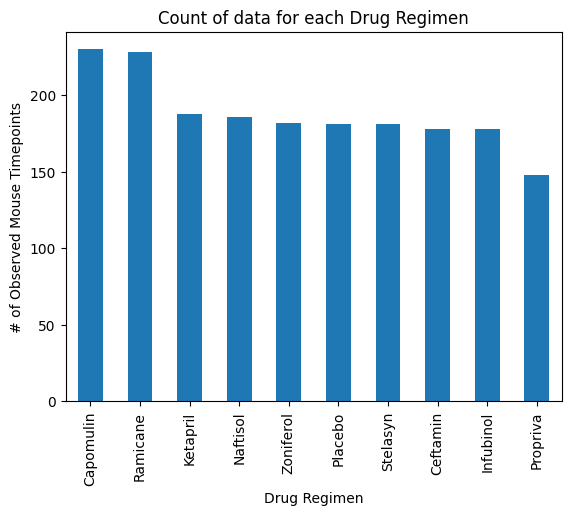

In [38]:
# Bar graph using Pandas
plot_df.plot(kind="bar", ylabel="# of Observed Mouse Timepoints",title = "Count of data for each Drug Regimen")


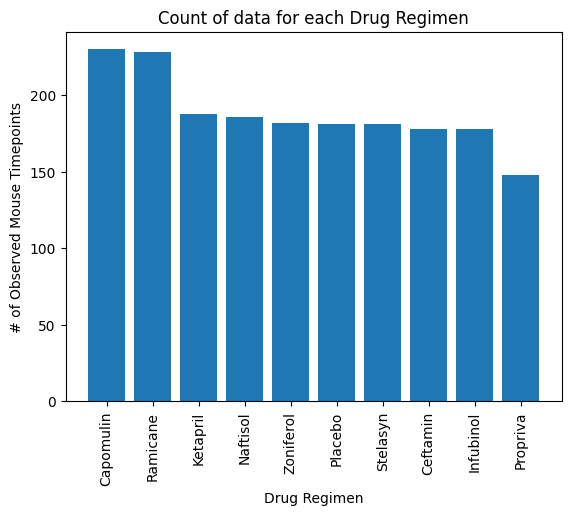

In [39]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x = plot_df.index
y = plot_df.values
plt.bar(x,y)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = "vertical")
plt.title("Count of data for each Drug Regimen")

plt.show()


In [40]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_df = clean_mouse_data["Sex"].value_counts()
gender_df

Sex
Male      958
Female    922
Name: count, dtype: int64

<Axes: title={'center': 'Distribution of Female versus Male mice'}, ylabel='Sex'>

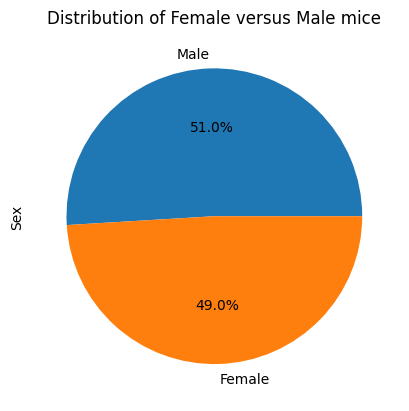

In [41]:
gender_df.plot(kind = "pie", ylabel = "Sex",title = "Distribution of Female versus Male mice", autopct = "%1.1f%%")

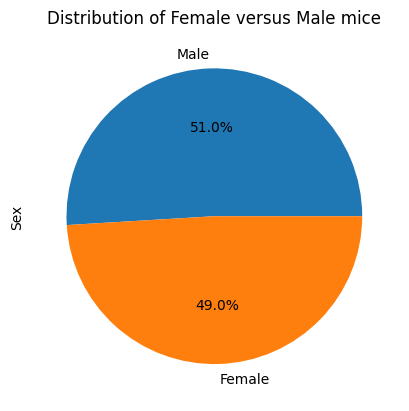

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_df,labels = gender_df.index, autopct = "%1.1f%%")
plt.title("Distribution of Female versus Male mice")
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [43]:
clean_mouse_data#.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor_volume =clean_mouse_data.groupby(["Mouse ID"])["Timepoint"].max().reset_index().\
                                             rename(columns = {"Timepoint" : "Max Timepoint"})
max_tumor_volume


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_mouse_data,max_tumor_volume, on = "Mouse ID")
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17,45
1876,m601,30,31.758275,1,Capomulin,Male,22,17,45
1877,m601,35,30.834357,1,Capomulin,Male,22,17,45
1878,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [45]:
# Put treatments into a list for for loop (and later for plot labels)

four_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for drug in four_regimen:
    drug_data = merge_df.loc[merge_df["Drug Regimen"] == drug]
#drug_data
    final_tumor_volume = drug_data.loc[drug_data["Timepoint"] == drug_data["Max Timepoint"]]["Tumor Volume (mm3)"]
#final_tumor_volume
    tumor_volume_data.append(final_tumor_volume)
#tumor_volume_data
    
    # Determine outliers using upper and lower bounds

for i, drug in enumerate(four_regimen):
    quartiles = tumor_volume_data[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    print(f"{drug} lower_bound :{lower_bound}")
    print(f"{drug} upper_bound :{upper_bound}")
    outliers = tumor_volume_data[i][(tumor_volume_data[i] < lower_bound) | (tumor_volume_data[i] > upper_bound)]
  
    print(f"{drug} Potential Outliers : {outliers}")
    print("----------------------")

Capomulin lower_bound :20.70456164999999
Capomulin upper_bound :51.83201549
Capomulin Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------
Ramicane lower_bound :17.912664470000003
Ramicane upper_bound :54.30681135
Ramicane Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------
Infubinol lower_bound :36.83290494999999
Infubinol upper_bound :82.74144559000001
Infubinol Potential Outliers : 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
----------------------
Ceftamin lower_bound :25.355449580000002
Ceftamin upper_bound :87.66645829999999
Ceftamin Potential Outliers : Series([], Name: Tumor Volume (mm3), dtype: float64)
----------------------


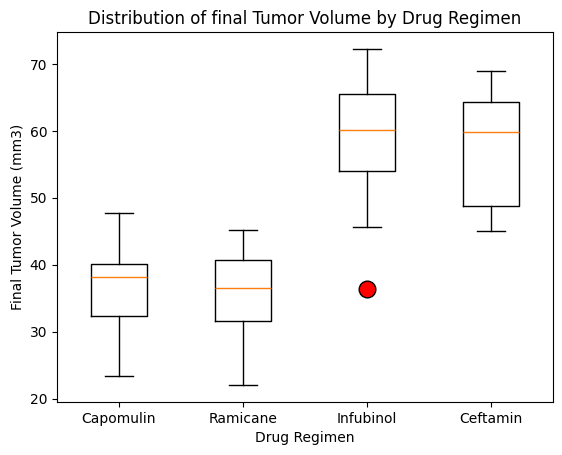

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig,ax = plt.subplots()
ax.boxplot(tumor_volume_data,labels = four_regimen,\
            flierprops = dict(marker = "o", markerfacecolor = "red",markersize = 12))
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.set_title("Distribution of final Tumor Volume by Drug Regimen")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, "Tumor Volume over time for mouse 'b128' treated with Capomulin")

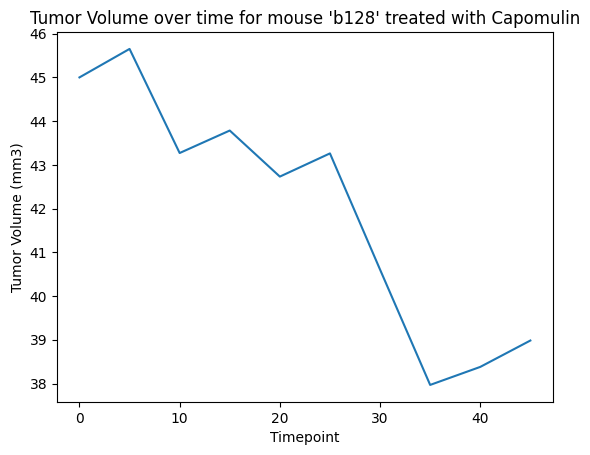

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_mouse_data[clean_mouse_data["Drug Regimen"] == "Capomulin"]
#capomulin_df

# Get the data for single mouse
capomulin_mouse = capomulin_df["Mouse ID"].unique()
selected_mouse = capomulin_mouse[0]

selected_mouse_df = capomulin_df[capomulin_df["Mouse ID"] == selected_mouse]
#selected_mouse_df

# Create a line plot 
x = selected_mouse_df["Timepoint"]
y =selected_mouse_df["Tumor Volume (mm3)"]

plt.plot(x,y)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over time for mouse 'b128' treated with Capomulin")


In [48]:
#selected_mouse_df

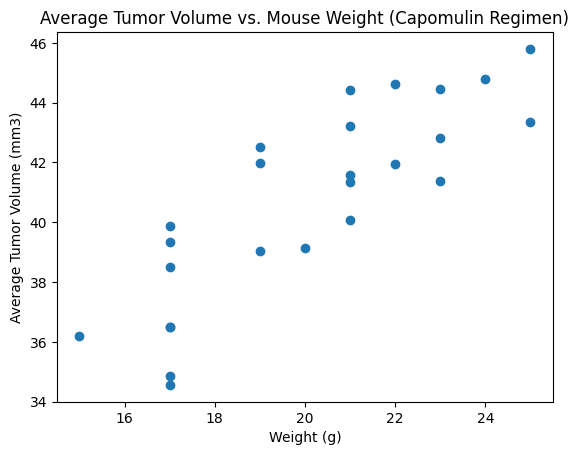

In [49]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

avg_tumor_volume = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_weight_volume = pd.merge(avg_tumor_volume,mouse_metadata, on = "Mouse ID")
x = capomulin_weight_volume["Weight (g)"]
y = capomulin_weight_volume["Tumor Volume (mm3)"]

plt.scatter(x,y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin Regimen)")
plt.show()

In [50]:
#capomulin_weight_volume

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x = capomulin_weight_volume["Weight (g)"]
y = capomulin_weight_volume["Tumor Volume (mm3)"]
corelation = st.pearsonr(x,y)
print(f"The corelation coefficient between mouse weight and average ovserved tumor is {round(corelation[0],2)}")


The corelation coefficient between mouse weight and average ovserved tumor is 0.84


slope:  0.9544396890241049
intercept:  21.552160532685008
rvalue:  0.8419363424694721


Text(0.5, 1.0, 'Average Tumor Volume Vs. Mouse Weight (Capomulin Regimen)')

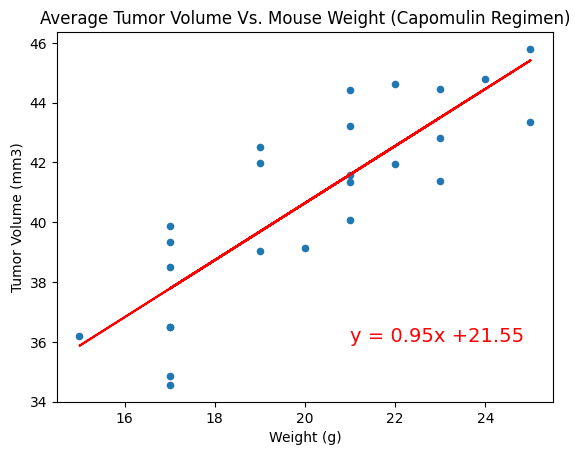

In [52]:
#capomulin_df
#capomulin_weight_volume

# Linear regression model
slope, intercept, rvalue, pvalue, stdrr = linregress(x,y)
print("slope: ",slope)
print("intercept: ",intercept)
print("rvalue: ",rvalue)

y_line = (slope) * x + (intercept)
y_line

ax = capomulin_weight_volume.plot(kind = "scatter",\
                                   x = "Weight (g)", y =  "Tumor Volume (mm3)")
plt.plot(x, y_line, color = "red")
line_eq = "y = " +str(round(slope,2)) + "x " + "+" + str(round(intercept,2))
plt.annotate(line_eq,(21,36),fontsize = 14, color = "red")
plt.title("Average Tumor Volume Vs. Mouse Weight (Capomulin Regimen)")